In [1]:
source("/home/user/data2/lit/bin/lit_utils.R")
source("/home/user/data3/lit/project/sORFs/sORFs.utils.R")
lib_text()
lib_plot()
uniprot_tab_info_path <- "/home/user/data3/lit/project/sORFs/02-Mass-spec/human/S3/uniprot.human.sep.tab_info.txt"
putative_sep_undetected_sampled_tab_info_path <- "./output/S7/all_putative_sep_undetected_sampled.tab_info.txt"
sep_ms_detected_sampled_tab_info_path <- "./output/sep_add_basic_ms_ribo_info_group_retained.txt"

fread_c(uniprot_tab_info_path) -> uniprot_tab_info
fread_c(putative_sep_undetected_sampled_tab_info_path) -> putative_sep_undetected_sampled_tab_info
fread_c(sep_ms_detected_sampled_tab_info_path) -> sep_ms_detected_sampled_tab_info
mutate(putative_sep_undetected_sampled_tab_info,
       Unique_psm_n=0,
       Unique_peptide_n=0) -> putative_sep_undetected_sampled_tab_info
colnames(uniprot_tab_info) -> x
colnames(putative_sep_undetected_sampled_tab_info) -> y
colnames(sep_ms_detected_sampled_tab_info) -> z
intersect(x,y) %>% intersect(z) -> common_cols

rbind(uniprot_tab_info[,common_cols],
      sep_ms_detected_sampled_tab_info[,common_cols],
      putative_sep_undetected_sampled_tab_info[,common_cols]) -> combined_df

# uniprot来源的蛋白质中有一些重复
duplicated_rows <- combined_df %>%
  group_by(Seq) %>%
  filter(n() > 1) %>%
  ungroup()
combined_df %>% distinct(Seq,.keep_all = T) -> combined_df_1

# 生成四个组别
mutate(combined_df_1,Source=case_when(
  Unique_psm_n!=0 & Type=="Canonical" ~ "Cano_detected",
  Unique_psm_n==0 & Type=="Canonical" ~ "Cano_undetected",
  Unique_psm_n!=0 & Type!="Canonical" ~ "Uncano_detected",
  Unique_psm_n==0 & Type!="Canonical" ~ "Uncano_undetected_sampled",
)) -> combined_df_2

mutate(combined_df_2,Source_1=case_when(
  Source=="Cano_detected" | Source=="Cano_undetected"~ "Cano",
  TRUE ~ Source,
)) -> combined_df_3

In [5]:
library(Peptides)
library(Biostrings)
pI(combined_df_3$Seq) -> combined_df_3$pI
hydrophobicity(combined_df_3$Seq, scale = "KyteDoolittle") -> combined_df_3$Hydrophobicity

Warning message:
“Sequence 436 has unrecognized amino acid types. Output value might be wrong calculated”
Warning message:
“Sequence 679 has unrecognized amino acid types. Output value might be wrong calculated”
Warning message:
“Sequence 1223 has unrecognized amino acid types. Output value might be wrong calculated”
Warning message:
“Sequence 1955 has unrecognized amino acid types. Output value might be wrong calculated”
Warning message:
“Sequence 2157 has unrecognized amino acid types. Output value might be wrong calculated”
Warning message:
“Sequence 2766 has unrecognized amino acid types. Output value might be wrong calculated”
Warning message:
“Sequence 2961 has unrecognized amino acid types. Output value might be wrong calculated”


Warning message:
“Removed 19 rows containing missing values (`geom_violin()`).”


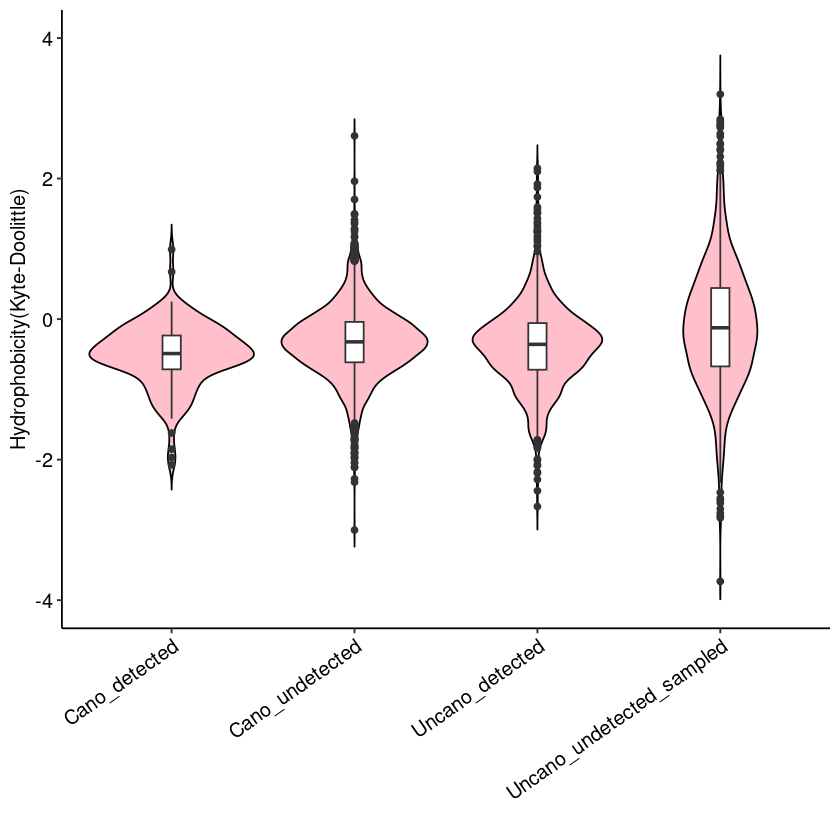

In [6]:
 ggplot(combined_df_3, aes(x = Source, y = Hydrophobicity)) +
  geom_violin(trim = FALSE, fill = "pink", color = "black") +
  geom_boxplot(width = 0.1, fill = "white") +
  labs(x = " ", y = "Hydrophobicity(Kyte-Doolittle)") +
  theme_3(rotate = T) +
  ylim(-4, 4) 


Attaching package: ‘scales’


The following object is masked from ‘package:viridis’:

    viridis_pal


The following object is masked from ‘package:tidyfst’:

    percent


Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 3849 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“The following aesthetics were dropped during statistical transformation: fill
ℹ This can happen when ggplot fails to infer the correct grouping structure in
  the data.
ℹ Did you forget to specify a `group` aesthetic or to convert a numerical
  variable into a factor?”
Warning message:
“Removed 3849 rows containing non-finite values (`stat_boxplot()`).”


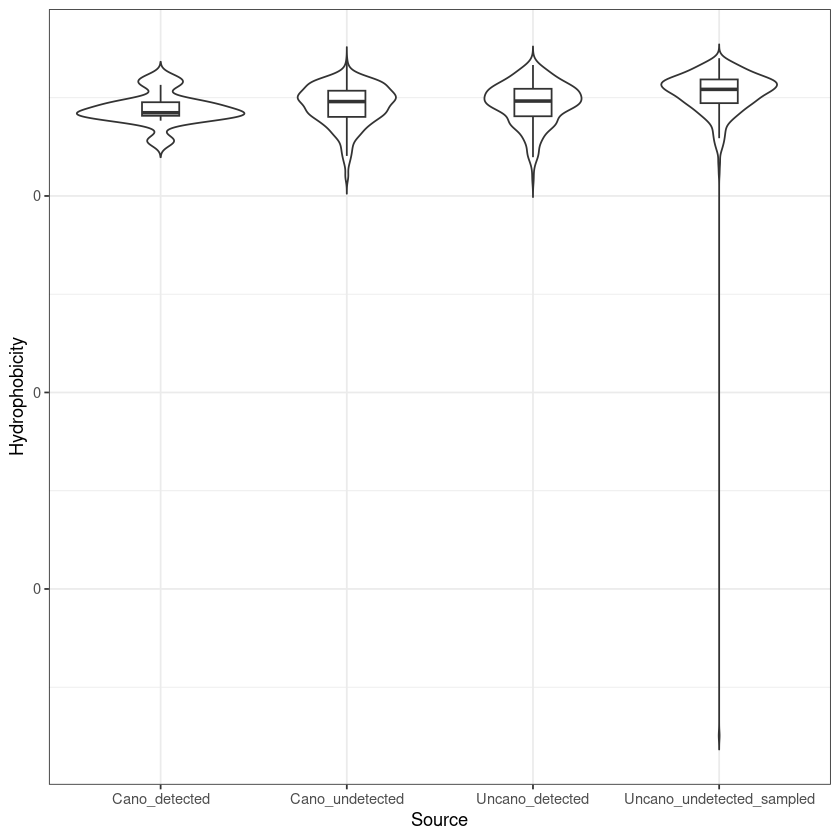

In [9]:
library(scales)
box_violin_plot(data = combined_df_3,x = "Source",y="Hydrophobicity",fill_col="Hydrophobicity")

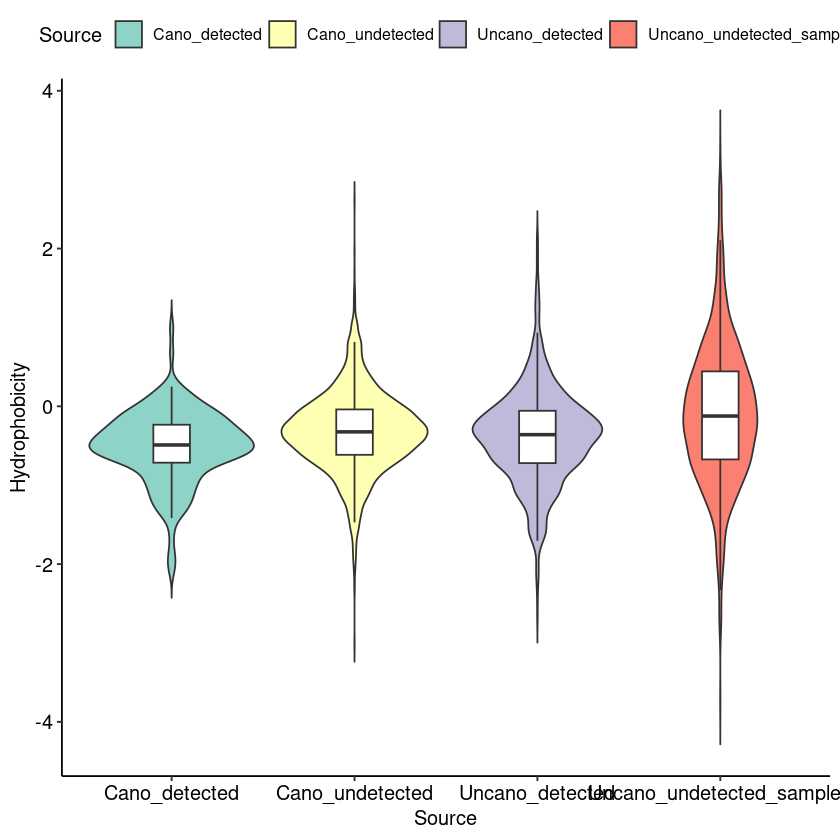

In [20]:
ggplot(combined_df_3, aes_string(x = "Source", y = "Hydrophobicity",fill="Source")) + 
        geom_violin(trim = F) + geom_boxplot(outlier.shape = NA, 
        fill = "white", width = 0.2) + scale_fill_manual(values = brewer.pal(n = n_distinct(combined_df_3[,"Source"]), name = "Set3")) + theme_3()

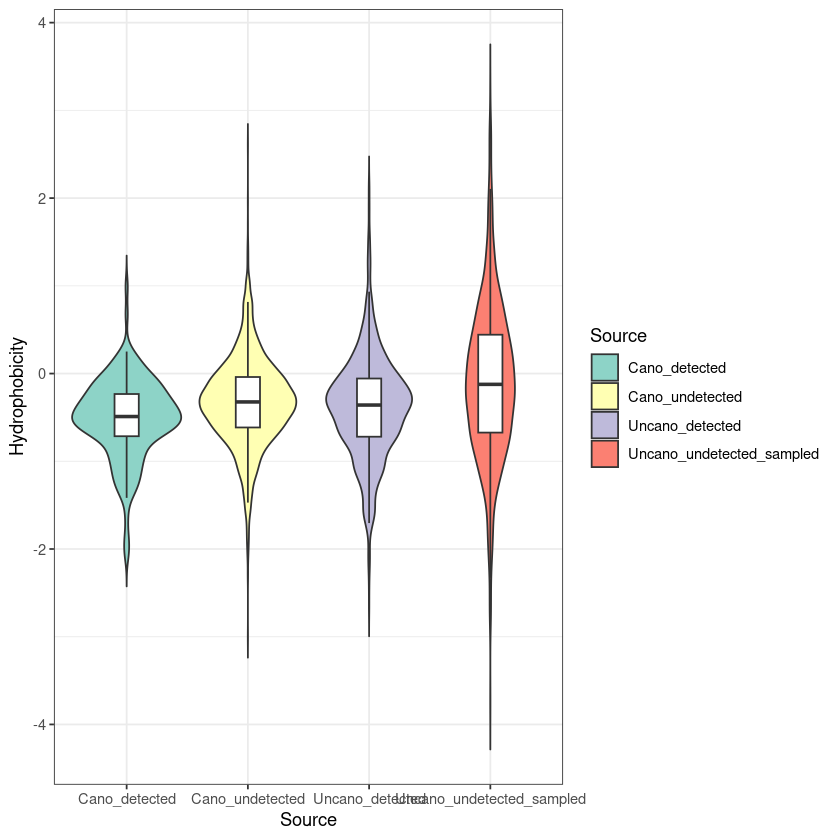

In [17]:
# 确保 Source 列是因子型
combined_df_3$Source <- as.factor(combined_df_3$Source)

# 绘制小提琴图和箱线图
p <- ggplot(combined_df_3, aes(x = Source, y = Hydrophobicity, fill = Source)) +
  geom_violin(trim = FALSE) +
  geom_boxplot(outlier.shape = NA, fill = "white", width = 0.2) +
  scale_fill_manual(values = brewer.pal(n = n_distinct(combined_df_3$Source), name = "Set3")) +
  theme_bw()

# 打印图形
print(p)

In [10]:
box_violin_plot

function (data, x, y, fill_col, log10 = T) 
{
    p <- ggplot(data, aes_string(x = x, y = y, fill = fill_col)) + 
        geom_violin(trim = F) + geom_boxplot(outlier.shape = NA, 
        fill = "white", width = 0.2) + scale_fill_manual(values = brewer.pal(n = n_distinct(data[, 
        x]), name = "Set3")) + theme_bw()
    if (log10) {
        p <- p + scale_y_log10(labels = label_number())
    }
    return(p)
}
<bytecode: 0x11cf53e0>

In [ ]:
# 设置工作目录
setwd("/home/user/data3/lit/project/sORFs/03-Cross-anna/analysis/annotate_ms_orfs_20250401")
source("/home/user/data2/lit/bin/lit_utils.R")
source("/home/user/data3/lit/project/sORFs/sORFs.utils.R")
lib_text()

# 读入之前注释好的最终的基于质谱的sep的list
fread_c("./output/sep_add_basic_ms_ribo_info_group_retained.txt") -> ms_sep
ms_sep %>% filter(ORF_type_1=="ncORF") -> ms_sep_on_lncRNA
unique(ms_sep_on_lncRNA$Gene_name) %>% length()

# 如果是ATG起始的密码子，会有些是同一个终止密码子
ms_sep %>% filter(ORF_type_1=="ncORF") %>% filter(Scodon=="ATG") %>% nrow()
ms_sep %>% filter(ORF_type_1=="ncORF") %>% filter(Scodon=="ATG") %>% n_distinct(.$Gene_name)                                     

GO_KEGG_cus <- function(gene_lst){
  library(clusterProfiler)
  library(KEGG.db)
  enrichGO(gene=gene_lst,
           OrgDb="org.Hs.eg.db",
           ont="ALL",
           keyType = "SYMBOL",
           pAdjustMethod = "BH",
           pvalueCutoff = 0.05,
           qvalueCutoff = 0.05,
           readable = TRUE) -> enrich_GO
  gene_lst_ENTREZID <-
    bitr(gene_lst,
         fromType = "SYMBOL",
         toType = "ENTREZID",
         OrgDb = "org.Hs.eg.db")
  enrichKEGG(
    gene = gene_lst_ENTREZID$ENTREZID,
    organism = "hsa",
    pAdjustMethod = "BH",
    pvalueCutoff = 0.05,
    qvalueCutoff = 0.05,
    use_internal_data = T
  ) -> enrich_KEGG
  add_Desc <- function(enrich_result) {
    frame = toTable(KEGGPATHID2NAME)
    # add description
    merge(frame,
          enrich_result@result,
          by.x = "path_id",
          by.y = "ID") %>% mutate(Description = NULL) %>%
      dplyr::rename(., Description = path_name, ID = path_id) %>% arrange(pvalue, qvalue) -> tmp
    rownames(tmp) <- tmp$ID
    enrich_KEGG_up_add <- enrich_result
    enrich_KEGG_up_add@result <- tmp
    # convert ENTREZID to gene symbol
    setReadable(enrich_KEGG_up_add, 'org.Hs.eg.db', 'ENTREZID') -> enrich_KEGG_up_add_1
    return(enrich_KEGG_up_add_1)
  } 
  add_Desc(enrich_KEGG) -> enrich_KEGG
  return(list(enrich_GO=enrich_GO,enrich_KEGG=enrich_KEGG))
}

gene_lst <- unique(ms_sep_on_lncRNA$Gene_name)
# 所有的sep所在的非编码转录本对应的基因
GO_KEGG_cus(gene_lst) -> ncRNA_sep_GO_KEGG
dotplot(ncRNA_sep_GO_KEGG$enrich_GO)
dotplot(ncRNA_sep_GO_KEGG$enrich_KEGG)

# 所有的sep所在的非编码转录本对应的基因（但是基因是非编码基因）
ms_sep %>% filter(ORF_type_1=="ncORF"&Gene_type!="protein_coding") -> ms_sep_on_lncRNA_non_pc_gene
gene_lst <- unique(ms_sep_on_lncRNA_non_pc_gene$Gene_name)
# NULL
GO_KEGG_cus(gene_lst) -> ncRNA_sep_non_pc_gene_GO_KEGG

library(clusterProfiler)
enrichGO(gene=gene_lst,
         OrgDb="org.Hs.eg.db",
         ont="ALL",
         keyType = "SYMBOL",
         pAdjustMethod = "BH",
         pvalueCutoff = 0.05,
         qvalueCutoff = 0.05,
         readable = TRUE) -> enrich_GO
dotplot(enrich_GO)


ms_sep_on_lncRNA_non_pc_gene %>% filter(Scodon=="ATG"&Gene_type=="lncRNA")


colnames(ms_sep)
fread_c("./output/S5/merged_rna_counts.txt") -> expr
mean(expr$Mean_rpkm)
median(expr$Mean_rpkm)
# 转录本的信息（用于确定微蛋白对应的转录本在哪个基因上）
ts_meta_path <- "/home/user/data3/lit/project/sORFs/01-ribo-seq/analysis/Run_for_human_20250227/human_trans_database_20250324/transcript_meta_output/ts.meta.txt"
fread_c(ts_meta_path) -> ts_meta
distinct(ts_meta,V2,V3) -> gene_id_name_map
merge(expr,gene_id_name_map,by.x="Geneid",by.y="V2") %>% merge(ms_sep,by.x="V3",by.y="Gene_name") -> ms_sep_expr
mean(ms_sep_expr$Mean_rpkm)
median(ms_sep_expr$Mean_rpkm)
filter(ms_sep_expr,Mean_rpkm>=5) %>% nrow()
filter(ms_sep_expr,Mean_rpkm>=10) %>% nrow()

filter(ms_sep_expr,Gene_type!="protein_coding") %>% nrow()
filter(ms_sep_expr,ORF_type_1=="ncORF"&Gene_type!="protein_coding") %>% nrow()
filter(ms_sep_expr,Mean_rpkm>=5 & ORF_type_1=="ncORF"&Gene_type!="protein_coding") %>% nrow()

filter(ms_sep_expr,ORF_type_1=="ncORF"&Gene_type!="protein_coding") %>% density_plot(.$Mean_rpkm)+xlim(0,5)
filter(ms_sep_expr,ORF_type_1=="ncORF"&Gene_type!="protein_coding") %>% density_plot(.$Mean_counts)+xlim(0,100)
